In [1]:
import os
import math
from obspy import UTCDateTime
import numpy as np

def get_location_ortime(fname1):
    doc = open(fname1,'r')
    srcrec1 = doc.readlines()
    doc.close()

    list_ortime    = []
    list_lat       = []
    list_lon       = []
    list_dep       = []

    cc = 0
    for iline in range(len(srcrec1)):
        if (cc == 0):   # event line
            tmp = srcrec1[iline].split()
            year    = int(tmp[1])
            month   = int(tmp[2])
            day     = int(tmp[3])
            hour    = int(tmp[4])
            minute  = int(tmp[5])
            second  = float(tmp[6])
            ortime1 = UTCDateTime(year,month,day,hour,minute,0) + second

            lat1    = float(tmp[7])
            lon1    = float(tmp[8])
            dep1    = float(tmp[9])

            list_ortime.append(ortime1)
            list_lat.append(lat1)
            list_lon.append(lon1)
            list_dep.append(dep1)

            ndata   = int(tmp[11])

            cc += 1
        else:   # data line
            if (cc == ndata):
                cc = 0
            else:
                cc += 1

    return (list_ortime,list_lat,list_lon,list_dep)




In [2]:
(ortime_init,lat_init,lon_init,dep_init) = get_location_ortime("src_rec_obs.dat")
(ortime_real,lat_real,lon_real,dep_real) = get_location_ortime("OUTPUT_FILES/OUTPUT_FILES_signal/src_rec_file_forward.dat")

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np

def plot_location_error(fname,output):

    (ortime_abs,lat_abs,lon_abs,dep_abs) = get_location_ortime(fname)

    fig = plt.figure(figsize=(24,24))
    gridspace = GridSpec(12,12,figure = fig)


    ax1 = fig.add_subplot(gridspace[0:6, 0:6])

    for i in range(len(lon_init)):
        ax1.plot([lon_abs[i],lon_init[i]],[lat_abs[i],lat_init[i]],'r--',linewidth=1)

    ax1.scatter(lon_real,lat_real,marker="*",color = "blue", label = "real",s=2000)
    ax1.scatter(lon_abs,lat_abs,marker="*",color = "red", label = "abs inv",s=500)
    ax1.scatter(lon_init,lat_init,marker="*",color = "black", label = "init",s=200,)

    ax1.legend(fontsize = 14)
    ax1.tick_params(axis='x',labelsize=18)
    ax1.tick_params(axis='y',labelsize=18)
    ax1.set_xlabel('Longitude',fontsize=18)
    ax1.set_ylabel('Latitude',fontsize=18)
    ax1.set_xlim((30,32))
    ax1.set_ylim((30,32))


    ax2 = fig.add_subplot(gridspace[0:6, 7:11])

    for i in range(len(dep_init)):
        ax2.plot([dep_abs[i],dep_init[i]],[lat_abs[i],lat_init[i]],'r--',linewidth=1)

    ax2.scatter(dep_real,lat_real,marker="*",color = "blue", label = "real",s=2000)
    ax2.scatter(dep_abs,lat_abs,marker="*",color = "red", label = "abs inv",s=500)
    ax2.scatter(dep_init,lat_init,marker="*",color = "black", label = "init",s=200,)

    # ax2.legend(fontsize = 14)
    ax2.tick_params(axis='x',labelsize=18)
    ax2.tick_params(axis='y',labelsize=18)
    ax2.set_xlabel('Depth (km)',fontsize=18)
    ax2.set_ylabel('Latitude',fontsize=18)
    ax2.set_xlim((0,40))
    ax2.set_ylim((30,32))


    ax3 = fig.add_subplot(gridspace[7:11, 0:6])

    for i in range(len(dep_init)):
        ax3.plot([lon_abs[i],lon_init[i]],[dep_abs[i],dep_init[i]],'r--',linewidth=1)

    ax3.scatter(lon_real,dep_real,marker="*",color = "blue", label = "real",s=2000)
    ax3.scatter(lon_abs,dep_abs,marker="*",color = "red", label = "abs inv",s=500)
    ax3.scatter(lon_init,dep_init,marker="*",color = "black", label = "init",s=200,)

    # ax3.legend(fontsize = 14)
    ax3.tick_params(axis='x',labelsize=18)
    ax3.tick_params(axis='y',labelsize=18)
    ax3.set_xlabel('Latitude',fontsize=18)
    ax3.set_ylabel('Depth (km)',fontsize=18)
    ax3.set_xlim((30,32))
    ax3.set_ylim((-2,40))
    ax3.invert_yaxis()


    ax4 = fig.add_subplot(gridspace[7:11, 7:11])
    # for i in range(len(dep_init)):
    #     ax4.plot([i,i],[ortime_abs[i]-ortime_real[i],ortime_init[i]-ortime_real[i]],'r--',linewidth=1)

    # ax4.scatter(lon_real,dep_real,marker="*",color = "red", label = "real",s=2000)
    index = []
    ortime_shift_abs = []
    ortime_shift_init = []
    for i in range(len(ortime_abs)):
        ortime_shift_abs.append(ortime_abs[i]-ortime_real[i])
        ortime_shift_init.append(ortime_init[i]-ortime_real[i])
        index.append(i)
    ax4.scatter(index,ortime_shift_abs,marker="*",color = "red", label = "abs inv",s=50)
    ax4.scatter(index,ortime_shift_init,marker="*",color = "black", label = "init",s=50)

    ax4.tick_params(axis='x',labelsize=18)
    ax4.tick_params(axis='y',labelsize=18)
    ax4.set_xlabel('Earthquake index',fontsize=18)
    ax4.set_ylabel('Relative origin time (s)',fontsize=18)
    # ax4.set_xlim(())
    ax4.set_ylim((-2,2))

    fig.savefig(output)

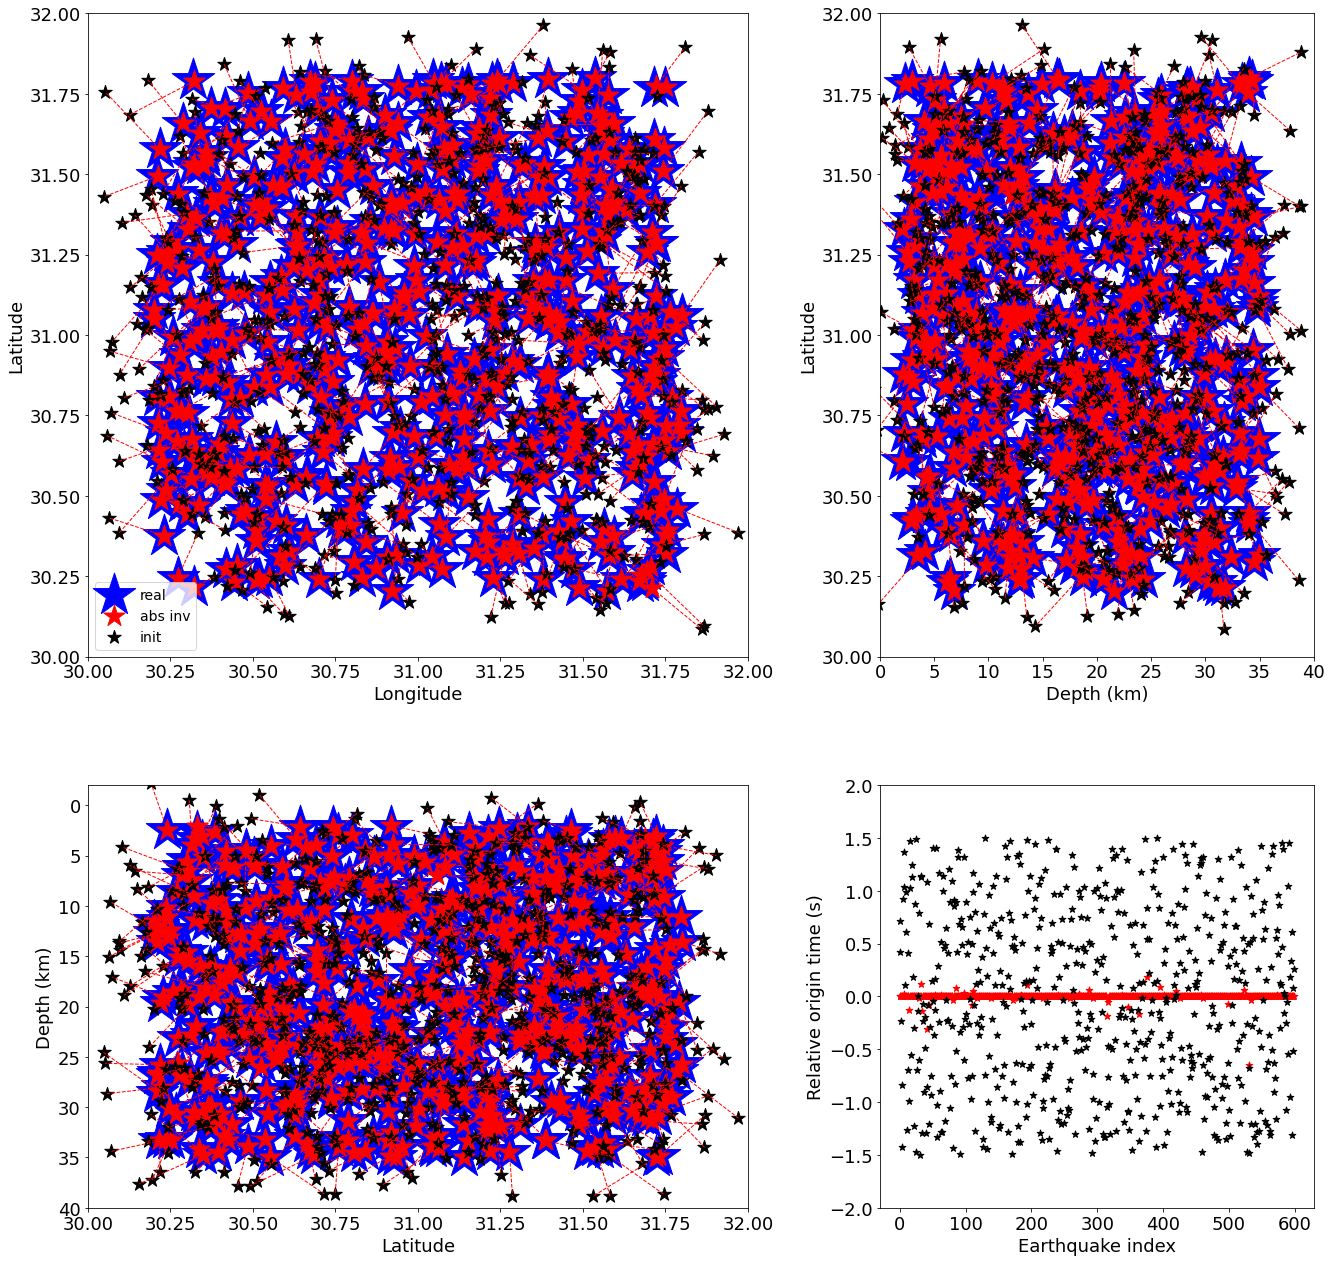

In [3]:
# abs
(ortime_abs,lat_abs,lon_abs,dep_abs) = get_location_ortime("OUTPUT_FILES/OUTPUT_FILES_reloc_abs/src_rec_file_reloc_obs.dat")
plot_location_error("OUTPUT_FILES/OUTPUT_FILES_reloc_abs/src_rec_file_reloc_obs.dat","img/reloc_abs.jpg")

# # common receiver
# (ortime_cr,lat_cr,lon_cr,dep_cr) = get_location_ortime("OUTPUT_FILES/OUTPUT_FILES_reloc_cr/src_rec_file_reloc_obs.dat")
# plot_location_error("OUTPUT_FILES/OUTPUT_FILES_reloc_cr/src_rec_file_reloc_obs.dat","img/reloc_cr.jpg")

# # abs + common receiver
# (ortime_abs_cr,lat_abs_cr,lon_abs_cr,dep_abs_cr) = get_location_ortime("OUTPUT_FILES/OUTPUT_FILES_reloc_abs_cr/src_rec_file_reloc_obs.dat")
# plot_location_error("OUTPUT_FILES/OUTPUT_FILES_reloc_abs_cr/src_rec_file_reloc_obs.dat","img/reloc_abs_cr.jpg")